In [1]:
import celldancer.simulation as cdsim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Circle

In [2]:
circle_gene=cdsim.simulate(kinetic_type='mono',
                    alpha1=1,
                    alpha2=0,
                    beta1=1,
                    beta2=1,
                    gamma1=1,
                    gamma2=1,
                    path1_pct=99,
                    path2_pct=99,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

/home/tung/anaconda3/envs/celldancer/lib/python3.7/site-packages/celldancer/simulation.py:205: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  'gammas': gammas.to_numpy() }


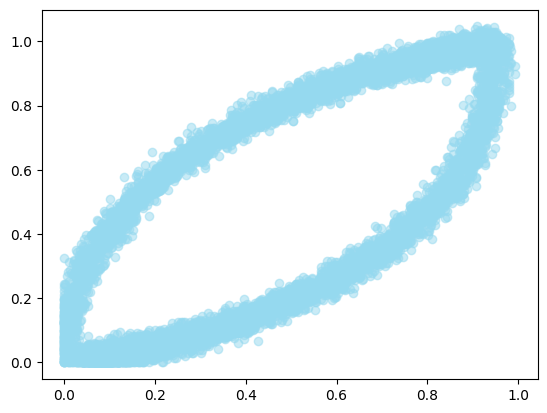

In [3]:
plt.scatter(circle_gene.splice,circle_gene.unsplice,c='#95D9EF',alpha=0.5)

# Transcriptional boosting

In [4]:
tb_gene=cdsim.simulate(kinetic_type='tran_boost',
                    alpha1=0.2,
                    alpha2=0.7,
                    beta1=0.6,
                    beta2=0.3,
                    gamma1=0.4,
                    gamma2=0.3,
                    path1_pct=99,
                    path2_pct=30,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

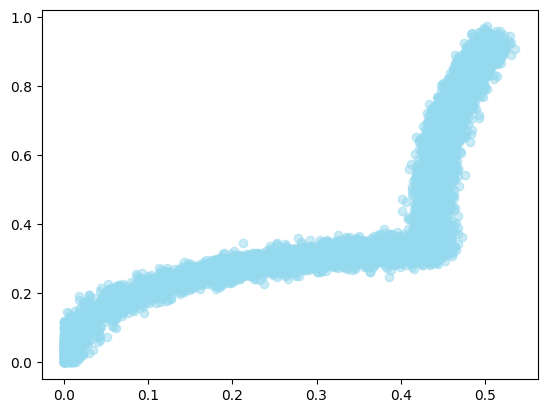

In [5]:
plt.scatter(tb_gene.splice,tb_gene.unsplice,c='#95D9EF',alpha=0.5)

# Multiple induction

In [6]:
mi_gene=cdsim.simulate(kinetic_type='multi_forward',
                    alpha1=0.45,
                    alpha2=0.75,
                    beta1=0.6,
                    beta2=0.4,
                    gamma1=0.35,
                    gamma2=0.85,
                    path1_pct=99,
                    path2_pct=99,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

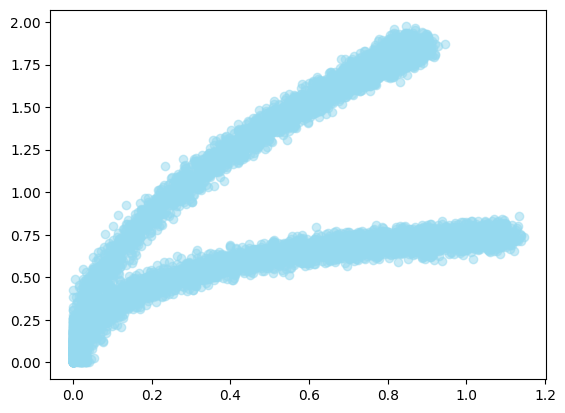

In [7]:
plt.scatter(mi_gene.splice,mi_gene.unsplice,c='#95D9EF',alpha=0.5)

# Multiple repression

In [8]:
mr_gene=cdsim.simulate(kinetic_type='multi_backward',
                    beta1=1,
                    beta2=1,
                    gamma1=1,
                    gamma2=1,
                    start_splice1=1,
                    start_splice2=1,
                    start_unsplice1=1,
                    start_unsplice2=0.2,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

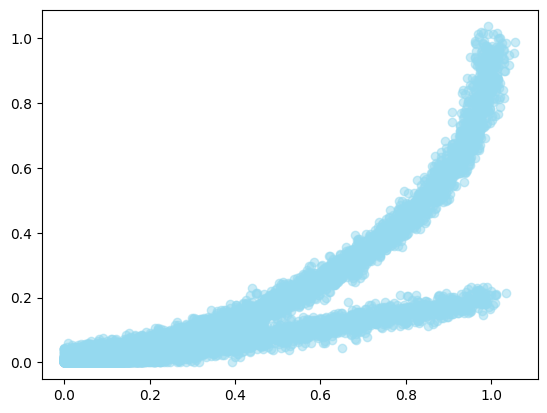

In [9]:
plt.scatter(mr_gene.splice,mr_gene.unsplice,c='#95D9EF',alpha=0.5)

# Merge

In [10]:
circle_u = np.array(circle_gene["unsplice"])
circle_s = np.array(circle_gene["splice"])
tb_u = np.array(tb_gene["unsplice"])
tb_s = np.array(tb_gene["splice"])
mi_u = np.array(mi_gene["unsplice"])
mi_s = np.array(mi_gene["splice"])
mr_u = np.array(mr_gene["unsplice"])
mr_s = np.array(mr_gene["splice"])

In [11]:
u = np.vstack([circle_u, tb_u, mi_u, mr_u])
s = np.vstack([circle_s, tb_s, mi_s, mr_s])

In [12]:
clusters = ["1" for i in range(0, 2500)] + ["2" for i in range(0, 2500)] + ["3" for i in range(0, 2500)] + ["4" for i in range(0, 2500)]

In [13]:
pseudotime = np.float64(np.linspace(0, 1, 10000)).tolist()

In [14]:
embedding = np.random.rand(10000, 2)

In [15]:
celltype = ["A" for i in range(0, 5000)] + ["B" for i in range(0, 5000)]

In [16]:
cell_index = [i for i in range(0, 10000)]

In [17]:
gene_number = [f"gene_{i}" for i in range(1, 5)]

In [18]:
mu = pd.DataFrame(u, index = gene_number, columns = cell_index)
ms = pd.DataFrame(s, index = gene_number, columns = cell_index)

# Export

In [19]:
mu.to_csv("data/Mu.csv")
ms.to_csv("data/Ms.csv")

In [20]:
with open("data/celltype.pkl", "wb") as f:
    pickle.dump(celltype, f)
with open("data/pseudotime.pkl", "wb") as f:
    pickle.dump(pseudotime, f)
with open("data/clusters.pkl", "wb") as f:
    pickle.dump(clusters, f)
with open("data/embedding.pkl", "wb") as f:
    pickle.dump(embedding, f)